## 安裝 TensorFlow 與 Keras

In [1]:
! pip install tensorflow

In [30]:
! pip install tensorflow-gpu

In [2]:
! pip install keras

## 讀取資料

### 方法二 (支線)

In [1]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/ywchiu/fuboni/master/data/Churn_Modelling.csv')

In [2]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
X = dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y = dataset['Exited'].values

In [4]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [5]:
X2 = pd.concat([pd.get_dummies(X['Geography']), X], axis = 1)
del X2['Geography']

X2 = X2.iloc[:,1:]
X2.head()

,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,619,0,42,2,0.00,1,1,1,101348.88
1,0,1,608,0,41,1,83807.86,1,0,1,112542.58
2,0,0,502,0,42,8,159660.80,3,1,0,113931.57
3,0,0,699,0,39,1,0.00,2,0,0,93826.63
4,0,1,850,0,43,2,125510.82,1,1,1,79084.10


### 方法一 (主線)

In [3]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/ywchiu/fuboni/master/data/Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:,13].values

In [6]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ..., 
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [8]:
set(X[:,1])

{'France', 'Germany', 'Spain'}

In [9]:
set(X[:,2])

{'Female', 'Male'}

In [11]:
!pip install sklearn

    100% |████████████████████████████████| 7.6MB 189kB/s ta 0:00:01
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /Users/davidchiu/Library/Caches/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn


In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencode_X_1 = LabelEncoder()
X[:,1] = labelencode_X_1.fit_transform(X[:,1])

In [13]:
labelencode_X_2 = LabelEncoder()
X[:,2] = labelencode_X_1.fit_transform(X[:,2])

In [14]:
X.shape

(10000, 10)

In [15]:
onehotencoder = OneHotEncoder(categorical_features=[1])

In [17]:
?OneHotEncoder

In [16]:
X2 = onehotencoder.fit_transform(X).toarray()

In [17]:
X2.shape

(10000, 12)

In [18]:
X[0:3,:]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57]], dtype=object)

In [19]:
X2[0,:]

array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         6.19000000e+02,   0.00000000e+00,   4.20000000e+01,
         2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.01348880e+05])

In [20]:
X2 = X2[:,1:]

In [21]:
X2.shape

(10000, 11)

## 將資料分為訓練與測試資料集

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 0)


In [23]:
X_train.shape

(8000, 11)

In [24]:
X_test.shape

(2000, 11)

In [25]:
y_train.shape

(8000,)

In [26]:
y_test.shape

(2000,)

## 尺度標準化

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [28]:
X_train

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ..., 
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [29]:
X_test = sc.transform(X_test)

In [30]:
X_test

array([[ 1.75486502, -0.57369368, -0.55204276, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-0.5698444 , -0.57369368, -1.31490297, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-0.5698444 ,  1.74309049,  0.57162971, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ..., 
       [-0.5698444 ,  1.74309049, -0.74791227, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [ 1.75486502, -0.57369368, -0.00566991, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [ 1.75486502, -0.57369368, -0.79945688, ...,  0.64259497,
        -1.03227043,  1.61255917]])

## 訓練ANN

In [31]:
import keras

Using TensorFlow backend.
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [32]:
from keras.models import Sequential
from keras.layers import Dense

In [33]:
X_train.shape

(8000, 11)

In [38]:
classifier = Sequential()

In [39]:
#help(Dense)

In [40]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [41]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.4806 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 1s 104us/step - loss: 0.4292 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 104us/step - loss: 0.4242 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 104us/step - loss: 0.4192 - acc: 0.8182
Epoch 5/100
8000/8000 [==============================] - 1s 104us/step - loss: 0.4167 - acc: 0.8272
Epoch 6/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.4145 - acc: 0.8296
Epoch 7/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.4128 - acc: 0.8317
Epoch 8/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.4113 - acc: 0.8321
Epoch 9/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.4101 - acc: 0.8334
Epoch 10/100
8000/8000 [==============================] - 1s 109us/step - loss: 0.4092 - acc: 0.8336

8000/8000 [==============================] - 1s 104us/step - loss: 0.3995 - acc: 0.8341
Epoch 82/100
8000/8000 [==============================] - 1s 103us/step - loss: 0.4002 - acc: 0.8360
Epoch 83/100
8000/8000 [==============================] - 1s 103us/step - loss: 0.3998 - acc: 0.8355
Epoch 84/100
8000/8000 [==============================] - 1s 103us/step - loss: 0.4005 - acc: 0.8362
Epoch 85/100
8000/8000 [==============================] - 1s 102us/step - loss: 0.3998 - acc: 0.8369
Epoch 86/100
8000/8000 [==============================] - 1s 102us/step - loss: 0.3997 - acc: 0.8361
Epoch 87/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.4001 - acc: 0.8370
Epoch 88/100
8000/8000 [==============================] - 1s 114us/step - loss: 0.3995 - acc: 0.8374
Epoch 89/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.3997 - acc: 0.8364
Epoch 90/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.4000 - acc: 0.8336
Epo

## 預測與驗證模型

In [42]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
y_pred = (y_pred > 0.5)

In [45]:
sum(y_pred.flatten().astype(int) == y_test) / len(y_test)

0.84150000000000003

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred )

In [47]:
cm

array([[1530,   65],
       [ 252,  153]])

## 驗證模型

In [52]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [55]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 1)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3, n_jobs = -1)

Epoch 1/1
Epoch 1/1
Epoch 1/1


Process ForkPoolWorker-14:
Process ForkPoolWorker-15:
Process ForkPoolWorker-12:
Process ForkPoolWorker-13:
Process ForkPoolWorker-16:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/davidch

KeyboardInterrupt: 

In [54]:
mean = accuracies.mean()
variance = accuracies.std()

NameError: name 'accuracies' is not defined

## 模型比較

In [49]:
cm

array([[1568,   27],
       [ 299,  106]])

In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [57]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
predicted = clf.predict(X_test)

In [59]:
cm2 = confusion_matrix(y_test, predicted)
cm2

array([[1526,   69],
       [ 309,   96]])

In [60]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
predicted2 = clf.predict(X_test)

In [62]:
cm3 = confusion_matrix(y_test, predicted2)
cm3

array([[1547,   48],
       [ 225,  180]])

In [63]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
predicted3 = clf.predict(X_test)

In [65]:
cm4 = confusion_matrix(y_test, predicted3)
cm4

array([[1520,   75],
       [ 192,  213]])

## 繪製ANN 的 ROC Curve

In [66]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)


Epoch 1/10
8000/8000 [==============================] - 1s 132us/step - loss: 0.5107 - acc: 0.7947
Epoch 2/10
8000/8000 [==============================] - 1s 99us/step - loss: 0.4150 - acc: 0.8172
Epoch 3/10
8000/8000 [==============================] - 1s 100us/step - loss: 0.4010 - acc: 0.8264
Epoch 4/10
8000/8000 [==============================] - 1s 102us/step - loss: 0.3925 - acc: 0.8300
Epoch 5/10
8000/8000 [==============================] - 1s 105us/step - loss: 0.3868 - acc: 0.8309 0s - loss: 0.3867 - acc: 
Epoch 6/10
8000/8000 [==============================] - 1s 103us/step - loss: 0.3826 - acc: 0.8306
Epoch 7/10
8000/8000 [==============================] - 1s 101us/step - loss: 0.3793 - acc: 0.8306
Epoch 8/10
8000/8000 [==============================] - 1s 103us/step - loss: 0.3765 - acc: 0.8300
Epoch 9/10
8000/8000 [==============================] - 1s 106us/step - loss: 0.3749 - acc: 0.8321
Epoch 10/10
8000/8000 [==============================] - 1s 100us/step - loss: 0.372

In [67]:
y_pred = classifier.predict(X_test)

In [68]:
predicted = (y_pred > 0.5).flatten().astype(int)

In [69]:
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
confusion_matrix(y_test, predicted)

array([[1545,   50],
       [ 282,  123]])

In [71]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

In [73]:
! pip install matplotlib

    100% |████████████████████████████████| 13.2MB 114kB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 1.4MB/s ta 0:00:01


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


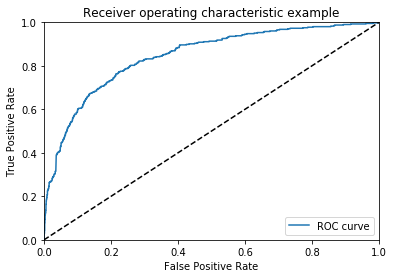

In [74]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## 比較不同分類器準確度

In [75]:
# ANN
classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(X_train, y_train)

clf3 = LogisticRegression()
clf3.fit(X_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

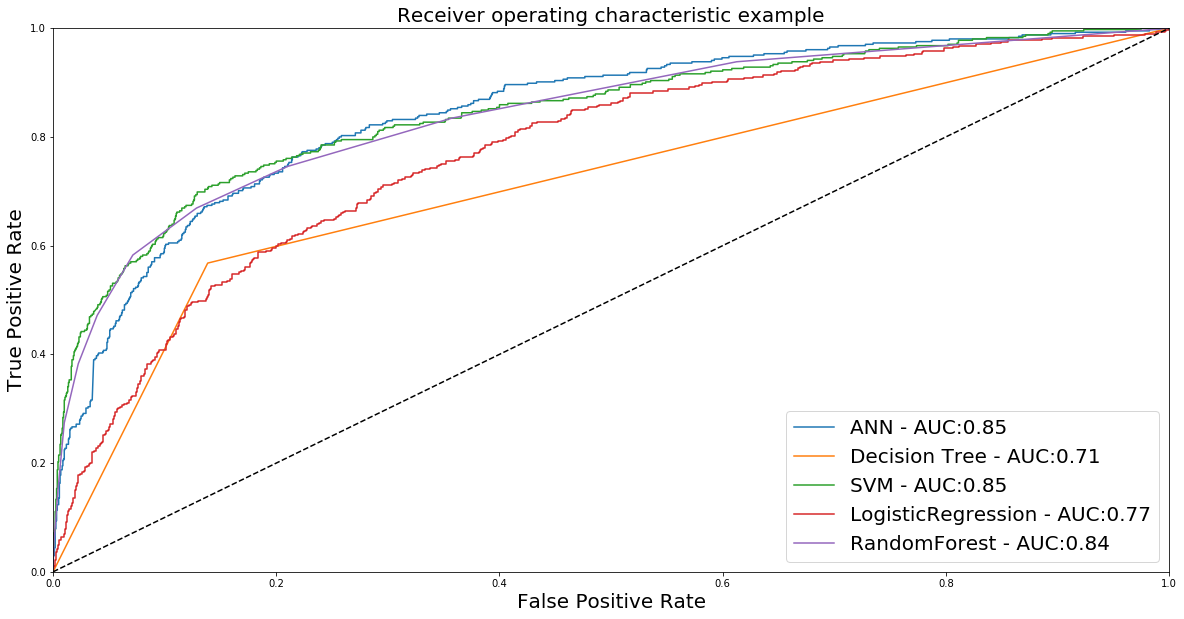

In [77]:
from sklearn.metrics import auc
plt.figure(figsize= [20,10])
for clf, title in zip([classifier,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()
